![Machine Learning Lab](banner.jpg)

# Laboratorio 1 Actividad

## Instrucciones

1. Esta actividad debe ser entregada por BN antes de la próxima clase (martes antes de las 6 pm) y es de carácter individual. No se permite entregar el laboratorio despues de la fecha establecida.
2. Al responder las preguntas de las actividades por favor marcar las respuestas con la sección a la que corresponden, por ejemplo: `## Exploracion de datos 2.1`. Es preferible que esto lo hagan con secciones de MarkDown como las del tutorial.
3. Por favor nombrar el archivo de acuerdo al siguiente formato `{email}_lab1.ipynb`.
4. Si tienen alguna duda pueden escribirme a mi correo `j.rayom@uniandes.edu.co` o contactarme directamente por Teams

El notebook final debe entregarse con todas las celdas ejecutadas, y debe poderse reproducir los resultados.

### Descargar datos

Para esta actividad usaremos un dataset de precios y tipos de diamantes

In [2]:
# crear la carpeta datasets si no existe
import os
if not os.path.exists('datasets'):
    os.makedirs('datasets')

In [3]:
!curl -L -o datasets/diamonds-prices-prediction.zip https://www.kaggle.com/api/v1/datasets/download/beridzeg45/diamonds-prices-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   125k      0  0:00:01  0:00:01 --:--:--  252k


In [ ]:
!unzip datasets/diamonds-prices-prediction.zip -d datasets/diamonds-prices-prediction

In [6]:
!ls datasets/diamonds-prices-prediction

diamonds (cleaned).csv


### Exploración de datos (25%)

Realiza las siguientes tareas

1. Cargar el dataset
2. Usa `ydata_profiling` para responder a las siguientes preguntas
   1. ¿Cuáles son las tres columnas con más valores faltantes?
   2. Cual es la media de la columna `Carat Weight`?
    3. Que columnas no son numéricas?

### Preparación de datos (25%)

1. Elimina las tres columnas identificadas en el paso 2.1.
2. Completa con el valor promedio los valores faltantes de las columnas numéricas
3. Completa con el valor más común los valores faltantes de las columnas no numéricas

### Regresión lineal (25%)

1. Separar la variable dependiente `Price` del resto
2. Separar el dataset en train y test con 80% para train y usando como random state 66
3. Codificar como one hot las columnas no numéricas restantes
4. Normalizar (Z-normalization) las columnas numéricas
5. Entrenar el modelo de regresión lineal
6. Realizar predicciones sobre el set de test
7. Conseguir (sobre los datos de testing) R2 MSE MAE
8. Responder: ¿Cuál es la variable con más peso en el modelo? Justifique como llego a esta conclusión.
9. Gráfica para el dataset de testing los valores reales vs. los valores predichos del precio.

### Regresión logística (25%)

1. Separar la variable dependiente `Type` del resto
2. Separar el dataset en train y test con 80% para train y usando como random state 66
3. Codificar como one hot las columnas no numéricas restantes
4. Normalizar (Z-normalization) las columnas numéricas
5. Entrenar el modelo de regresión logística
6. Realizar predicciones sobre el set de test
7. Conseguir (sobre los datos de testing) precision recall f1-score para cada clase predicha
8. Responder: ¿Cuál es la variable con más peso en el modelo para cada categoría? Justifique como llego a esta conclusion.
9. Gráfica para el dataset de testing la matriz de confusion.

---

In [ ]:
!pip3 install ydata-profiling ipywidgets scikit-learn --quiet

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
# librerías a usar
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/estefanialaverdebecerra/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1. Exploración de datos

1. Cargar el dataset

In [9]:
# lectura del dataset
data_diamonds = pd.read_csv('datasets/diamonds-prices-prediction/diamonds (cleaned).csv')
data_diamonds.head()

Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Type Fluorescence  
0    7.09   6.95    4.57   2640  GIA Lab-Grown          NaN  
1    9.64   5.86    3.66   1070  GIA Lab-Grown          NaN  
2    8.44   6.00    3.79   1070  GIA Lab-Grown          NaN  
3    5.85   6.89    4.25   7110            GIA        Faint  
4    6.80   5.05    3.50   3050            GIA          NaN

2. Usar `ydata_profiling` para responder a las siguientes preguntas
   1. ¿Cuáles son las tres columnas con más valores faltantes?
   2. Cual es la media de la columna `Carat Weight`?
   3. Que columnas no son numéricas?

In [10]:
profile = ProfileReport(data_diamonds, title="Diamonds Dataset Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 232.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Las tres columnas con más valores faltantes son `Cut`, `Culet` y `Fluorescence`.
- La media de la columna `Carat Weight` es 1.2357716.
- Las columnas que no son numéricas son `Shape`, `Cut`, `Color`, `Clarity`, `Polish`, `Symmetry`, `Girdle`, `Culet`, `Type` y `Fluorescence`.
---

# 2. Preparación de los datos

1. Elimina las tres columnas identificadas en el paso 2.1.

In [11]:
modified_data_diamonds = data_diamonds.drop(columns=['Cut', 'Culet', 'Fluorescence'])
print("Columnas tras eliminar las tres con más valores faltantes:", modified_data_diamonds.columns.tolist())

Columnas tras eliminar las tres con más valores faltantes: ['Shape', 'Color', 'Clarity', 'Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry', 'Girdle', 'Length', 'Width', 'Height', 'Price', 'Type']


2. Completa con el valor promedio los valores faltantes de las columnas numéricas

In [12]:
# columnas numericas
numeric_cols = modified_data_diamonds.select_dtypes(include=['number']).columns.tolist()

# imprimir numero de valores faltantes en columnas numéricas antes del procedimiento
print("Valores faltantes en columnas numéricas antes del procedimiento:")
print(modified_data_diamonds[numeric_cols].isnull().sum())

# completar valores faltantes en columnas numéricas con la media
for col in numeric_cols:
    mean_value = modified_data_diamonds[col].mean()
    modified_data_diamonds[col].fillna(mean_value, inplace=True)

# comprobar que las columnas numéricas no tienen valores faltantes
print("Valores faltantes en columnas numéricas después del procedimiento:")
print(modified_data_diamonds[numeric_cols].isnull().sum())

Valores faltantes en columnas numéricas antes del procedimiento:
Carat Weight           5
Length/Width Ratio     5
Depth %                7
Table %               17
Length                20
Width                 20
Height                20
Price                  0
dtype: int64
Valores faltantes en columnas numéricas después del procedimiento:
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Length                0
Width                 0
Height                0
Price                 0
dtype: int64


/var/folders/dj/ljhjywgx7050wg5x_690yv1c0000gn/T/ipykernel_5407/4237592852.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_data_diamonds[col].fillna(mean_value, inplace=True)


3. Completa con el valor más común los valores faltantes de las columnas no numéricas

In [13]:
# columnas no numéricas
categorical_cols = modified_data_diamonds.select_dtypes(include=['object']).columns.tolist()

# imprimir numero de valores faltantes en columnas no numéricas antes del procedimiento
print("Valores faltantes en columnas no numéricas antes del procedimiento:")
print(modified_data_diamonds[categorical_cols].isnull().sum())

# completar valores faltantes en columnas no numéricas con el valor más común - moda de las columnas
for col in categorical_cols:
    mode_value = modified_data_diamonds[col].mode()[0]
    modified_data_diamonds[col].fillna(mode_value, inplace=True)

# comprobar que las columnas no numéricas no tienen valores faltantes
print("Valores faltantes en columnas no numéricas después del procedimiento:")
print(modified_data_diamonds[categorical_cols].isnull().sum())

Valores faltantes en columnas no numéricas antes del procedimiento:
Shape        5
Color        5
Clarity      5
Polish      20
Symmetry    20
Girdle      22
Type         0
dtype: int64
Valores faltantes en columnas no numéricas después del procedimiento:
Shape       0
Color       0
Clarity     0
Polish      0
Symmetry    0
Girdle      0
Type        0
dtype: int64


/var/folders/dj/ljhjywgx7050wg5x_690yv1c0000gn/T/ipykernel_5407/1605801597.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_data_diamonds[col].fillna(mode_value, inplace=True)


# 3. Regresión Lineal

1. Separar la variable dependiente `Price` del resto

In [14]:
X = modified_data_diamonds.drop(columns=['Price'], axis=1)
y = modified_data_diamonds['Price']

2. Separar el dataset en train y test con 80% para train y usando como random state 66

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=66)

3. Codificar como one hot las columnas no numéricas restantes

In [16]:
# eliminar de las columnas numéricas el target ('Price')
numeric_cols.remove('Price')

# crear un ColumnTransformer para aplicar OneHotEncoder a las columnas categóricas y la normalización
trasformation = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols), # aplicar One Hot Encoding a las columnas categóricas
        ('scaler', StandardScaler(), numeric_cols) # escalar las columnas numéricas
    ], 
    remainder='passthrough')

# ajustar y transformar datos
X_train_transformed = trasformation.fit_transform(X_train)
X_test_transformed = trasformation.transform(X_test)

4. Normalizar (Z-normalization) las columnas numéricas

La normalización se implementó en el pipeline de ColumnTransformer, por lo que las variables X_train_transformed y X_test_transformed ya están normalizadas.

5. Entrenar el modelo de regresión lineal

In [17]:
model = LinearRegression()
model.fit(X_train_transformed, y_train)

LinearRegression()

6. Realizar predicciones sobre el set de test

In [18]:
y_pred = model.predict(X_test_transformed)
y_pred

array([ 4777.05943896,  3177.46696773,  2126.82783911, ...,
         975.15705287,  4465.83352208, 16621.60456231])

7. Conseguir (sobre los datos de testing) R2 MSE MAE

In [19]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R2: 0.6569858810671125
MSE: 3182036.0139283547
MAE: 1020.3499972048279


8. Responder: ¿Cuál es la variable con más peso en el modelo? Justifique como llego a esta conclusión.

La variable con más peso en un modelo de regresión lineal es aquella que tiene el coeficiente más alto en valor absoluto, indicando que tiene el mayor impacto en la predicción de la variable dependiente.
Para ello, es necesario observar los coeficientes del modelo entrenado, teniendo en cuenta la transformación aplicada a las variables independientes.

In [20]:
# obtener los nombres de las columnas después de la transformación
onehot_feature_names = trasformation.get_feature_names_out() # array de todos los nombres con el prefijo de la trasnformación

# obtener los coeficientes del modelo
coefficients = model.coef_

# creamos un DataFrame para visualizar los coeficientes junto con los nombres de las características
coef_df = pd.DataFrame({
    'Feature': onehot_feature_names,
    'Coefficient': coefficients
})

# ordenar el DF por el valor absoluto de los coeficientes en orden descendente
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

coef_df_sorted.head(10)

Feature  Coefficient
64                           scaler__Length  7180.249301
65                            scaler__Width -5433.574430
46   onehot__Girdle_Thin to Extremely Thick  5255.868997
61               scaler__Length/Width Ratio -4494.594826
3                       onehot__Shape_Heart  4365.090546
16                       onehot__Clarity_FL  4282.568793
4                    onehot__Shape_Marquise -3781.772810
57                         onehot__Type_GIA  3524.402140
6                        onehot__Shape_Pear -3517.743628
30  onehot__Girdle_Extremely Thin to Medium -3266.407548

Podemos observar que la variable cuyo coeficiente es el mayor en valor absoluto es **Length**.

9. Gráfica para el dataset de testing los valores reales vs. los valores predichos del precio.

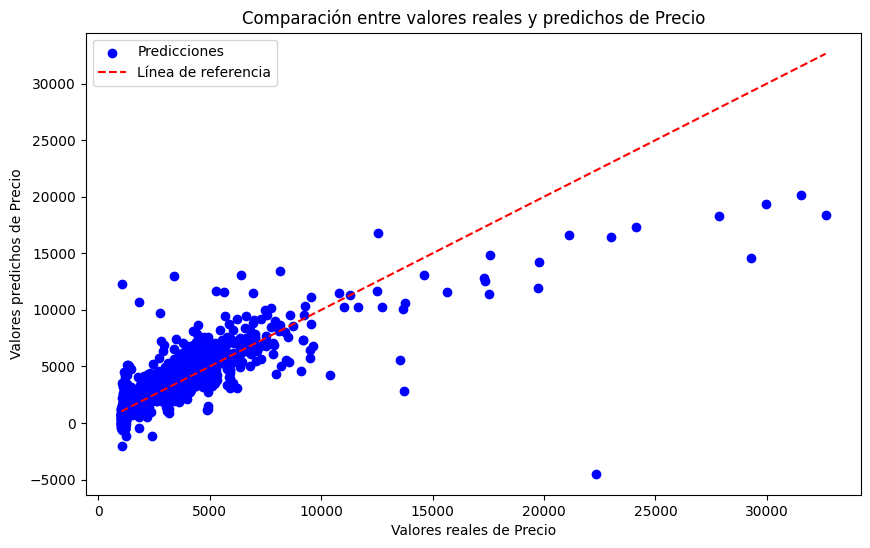

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--',
         label='Línea de referencia')
plt.xlabel('Valores reales de Precio')
plt.ylabel('Valores predichos de Precio')
plt.title('Comparación entre valores reales y predichos de Precio')
plt.legend()
plt.show()

La gráfica de resultados muestra una correlación positiva entre los valores reales y los predichos, empeorando ligeramente a medida que aumentan los valores de precio, lo que puede deberse a la alta concentración de datos en rangos bajos de precio. El R² de 0.66 indica que el modelo explica aproximadamente el 66% de la variabilidad en los precios de los diamantes, lo cual es razonable pero sugiere que hay otros factores no considerados que también influyen en el precio. Por otro lado, el valor de MAE de 1020.35 indica que, en promedio, las predicciones del modelo se desvían del valor real del precio en aproximadamente 1020.35 unidades monetarias, lo cual es significativo y sugiere que el modelo podría beneficiarse de mejoras adicionales o de la inclusión de más variables relevantes.

# 4. Regresión Logística

1. Separar la variable dependiente `Type` del resto.

In [22]:
X = modified_data_diamonds.drop(columns=['Type'], axis=1)
y = modified_data_diamonds['Type']

2. Separar el dataset en train y test con 80% para train y usando como random state 66

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=66)

3. Codificar como one hot las columnas no numéricas restantes

In [24]:
# instanciar nuevamente las columnas numéricas para tener 'Price'
numeric_cols = modified_data_diamonds.select_dtypes(include=['number']).columns.tolist()

# eliminar de las columnas categoricas el target ('Type')
categorical_cols.remove('Type')

# crear un ColumnTransformer para aplicar OneHotEncoder a las columnas categóricas
trasformation = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols), # aplicar One Hot Encoding a las columnas categóricas
        ('scaler', StandardScaler(), numeric_cols) # escalar las columnas numéricas
    ], 
    remainder='passthrough')

# ajustar y transformar datos
X_train_transformed = trasformation.fit_transform(X_train)
X_test_transformed = trasformation.transform(X_test)

4. Normalizar (Z-normalization) las columnas numéricas

La normalización se implementó en el pipeline de ColumnTransformer, por lo que las variables X_train_transformed y X_test_transformed ya están normalizadas.

5. Entrenar el modelo de regresión logística

In [25]:
# entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000)

6. Realizar predicciones sobre el set de test

In [26]:
y_pred = model.predict(X_test_transformed)
y_pred

array(['GIA Lab-Grown', 'IGI Lab-Grown', 'IGI Lab-Grown', ...,
       'IGI Lab-Grown', 'GIA', 'GIA'], dtype=object)

7. Conseguir (sobre los datos de testing) precision recall f1-score para cada clase predicha

In [27]:
# para obtener las métricas de evaluación de cada categoría usamos un classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

               precision    recall  f1-score   support

          GIA       0.99      1.00      0.99       666
GIA Lab-Grown       0.85      0.85      0.85       234
IGI Lab-Grown       0.92      0.92      0.92       397

     accuracy                           0.94      1297
    macro avg       0.92      0.92      0.92      1297
 weighted avg       0.94      0.94      0.94      1297



8. Responder: ¿Cuál es la variable con más peso en el modelo para cada categoría? Justifique como llego a esta conclusion.

Para determinar la variable con más peso en el modelo nuevamente analizamos los coeficientes de este mismo. Aquel con mayor valor absoluto indica la variable con mayor influencia en la predicción, y hacemos este cálculo para cada categoría.

In [28]:
# obtener nombres de las columnas
colum_names = trasformation.get_feature_names_out()

# obtener los coeficientes del modelo
coefficients = model.coef_

# organizar en un DataFrame
coef_df = pd.DataFrame(coefficients, columns=colum_names, index=model.classes_)

# organizar los coeficientes por valor absoluto para cada clase
coef_df_abs = coef_df.abs()
coef_df_sorted = coef_df_abs.apply(lambda x: x.sort_values(ascending=False).index.tolist(), axis=1)
print(coef_df_sorted.head(10))

GIA              [scaler__Price, onehot__Clarity_VS2, scaler__C...
GIA Lab-Grown    [onehot__Shape_Heart, onehot__Clarity_VS2, one...
IGI Lab-Grown    [onehot__Girdle_Medium, onehot__Shape_Cushion,...
dtype: object


De esta manera, podemos observar que para cada categoría la variable con mayor peso es:
- Para GIA: Precio
- Para GIA Lab-Grown: onehot Shape Heart
- Para IDI Lab-Grown: onehot Girdle Medium

9. Gráfica para el dataset de testing la matriz de confusion.

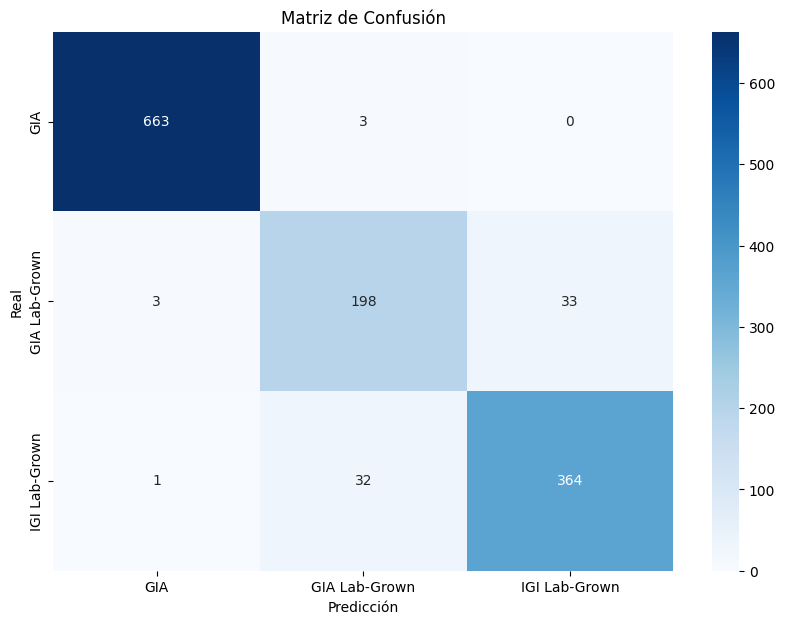

In [29]:
# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# grafica
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Podemos observar con las métricas y la matriz de confusión que el modelo tiene un buen desempeño en la clasificación de las diferentes categorías de diamantes, siendo las confusiones más comunes entre las categorías creadas en laboratorio.